### Teste de Perda de Qualidade de OCR em imagens no formato A4 a partir do reshaping

In [1]:
import cv2
from matplotlib import pyplot as plt
import pytesseract
import os
import rouge
from glob import glob
from functools import reduce

os.environ['OMP_THREAD_LIMIT'] = '6'

Supreme Tribunal Federal

RECURSO EXTRAORDINÁRIO 1.000.008 PARANA

 

REGISTRADO : MINISTRO PRESIDENTE
Recre.(s) :ADUCIO MARTINS
ADV.(A/s) VILLYAN ROWER SOARES
Recpo.(a/s) «INSTITUTO NACIONAL DO SEGURO SOCIAL - INSS
Proc.(a/s)(Es) :PROCURADOR-GERAL FEDERAL

DESPACHO

1. Este Supremo Tribunal submeteu as questões trazidas no presente
processo à sistemática da repercussão geral (Recurso Extraordinário n.
626.489, Tema n. 313, e Recurso Extraordinário com Agravo n. 906.569,
Tema n. 852)

2. Pelo exposto, determino à devolução destes autos ao Tribunal de
origem para observância dos procedimentos previstos nos arts. 1.036,
caput e 8 1º, 1039, caput e parágrafo único, e 1,040 do Código de
Processo Civil, anterior art. 543-B do Código de Processo Civil/1973 (art.
13, inc. V al. c, do Regimento Interno do Supremo Tribunal Federal)

 

Publique-se.
Brasilia, 24 de outubro de 2016.

Ministra CARMEN LUCIA
Presidente

demo pe se aerate no ergs onc pw ups areata! so mere 1810

 



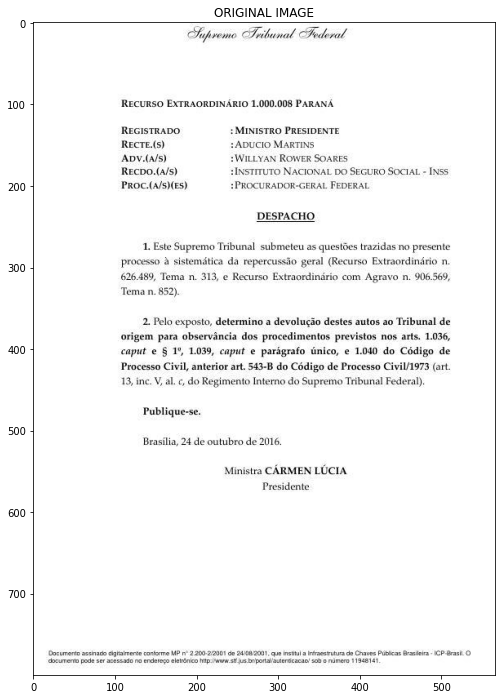

In [27]:
image_path = './is_ocr_images/1000008_310636853_1.jpg'

original_image = cv2.imread(image_path)

original_text = pytesseract.image_to_string(original_image, lang='por+eng')
print(original_text)

plt.figure(figsize=(16,12))
plt.imshow(original_image)
plt.title('ORIGINAL IMAGE')
plt.show()

In [37]:
shape = original_image.shape
width = shape[1]
height = shape[0]

print(shape)

dst_shape__width = (width, width)
dst_shape__height = (height, height)

(800, 566, 3)


Mipreme Tribunal Federal

RECURSO EXTRAORDINÁRIO 1.000.008 PARANÁ.

Recre(s) ADUCIO MARTINS

ADV.(A/S) WILLYAN ROWER SOARES

Rrcpo.(a/s) INSTITUTO NACIONAL DO SEGURO SOCIAL. - INSS
PROCAA/S)CES) SPROCURADOR-GERAL FEDERAL

1. Este Supremo Tribunal aubmeteu as questões trazidas no presente
ireçenno à pinhenática dá "iepenfisão” geral. (Recurge! Extoncenieadrio ni
626.489, Tema n 313, e Recurso Extraordinário com Agravo n. 906.569,
‘Tema nm. 852)

2. Pelo exposto, determino a devolução destes autos ao Tribunal de
origem para observância dos procedimentos previstos nos arts. 1.036,
caput e 5 1%, 1039, caput e parágrafo único, « 1040 do Código de
Processo Civil, anterior art. 543-B do Código de Processo Civil/1973 (art

 

 

de Regimento Intemo de Supreme Tribunal Federal)
Publique-se,
Brasílio, 24 de outubro de 2016.

Ministra CARMEN LUCIA
Presidente

 

 

 



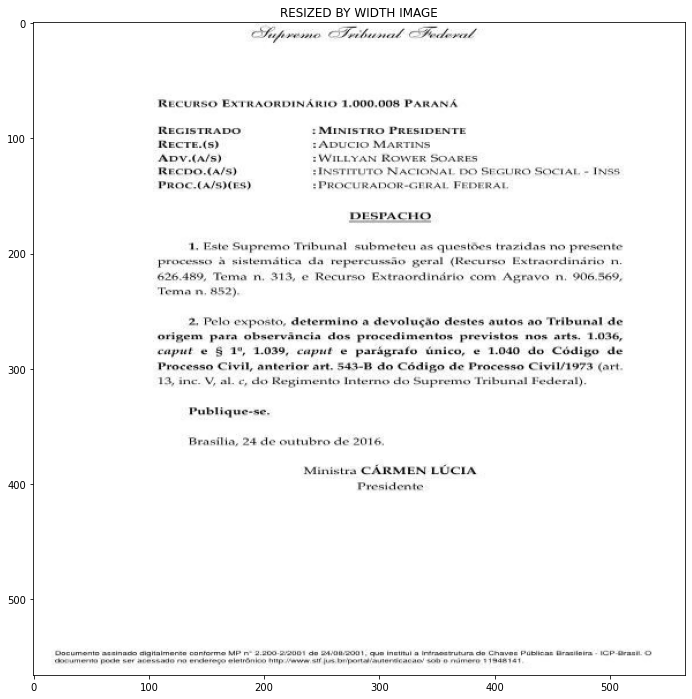

In [29]:
# Generating new image with original image width as image shape
# So, here we will convert a (800, 566, 3) image to a (566, 566, 3) image

target_image__width = cv2.resize(original_image, dst_shape__width)

cv2.imwrite('./width-img.jpg', target_image__width)
width_rezied_image = cv2.imread('./width-img.jpg')

width_resized_text = pytesseract.image_to_string(width_rezied_image, lang='por+eng')
print(width_resized_text)

plt.figure(figsize=(16,12))
plt.imshow(target_image__width)
plt.title('RESIZED BY WIDTH IMAGE')
plt.show()

Supreme Tribunal Federal

RECURSO EXTRAORDINÁRIO 1.000.008 PARANÁ

 

 

REGISTRADO MINISTRO PRESIDENTE
RECTE(s) :ADUCIO MARTINS
ADv.(A/s) WILLYAN ROWER SOARES
RECDO.(A/S) INSTITUTO NACIONAL DO SEGURO SOCIAL - INSS
PROC(A/SMES) =PROCURADOR-GERAL FEDERAL
DESPACHO

1. Este Supremo Tribunal submeteu as questões trazidas no presente
processo à sistemática da repercussão geral (Recurso Extraordinário n.
626.489, Tema n. 313, e Recurso Extraordinário com Agravo n. 906.569,
Tema n. 852).

2. Pelo exposto, determino a devolução destes autos ao Tribunal de
origem para observância dos procedimentos previstos nos arts. 1.036,
caput e § 1º, 1.039, caput e parágrafo único, e 1.040 do Código de
Processo Civil, anterior art. 543-B do Código de Processo Civil/1973 (art.
13, inc. V, al. c, do Regimento Interno do Supremo Tribunal Federal).

Publique-se.
Brasília, 24 de outubro de 2016.

Ministra CÁRMEN LÚCIA
Presidente

Documento aesinaco cigtalmanto conicemo MP nº 2200 2/2007 da 24/08/2004. que incl! 

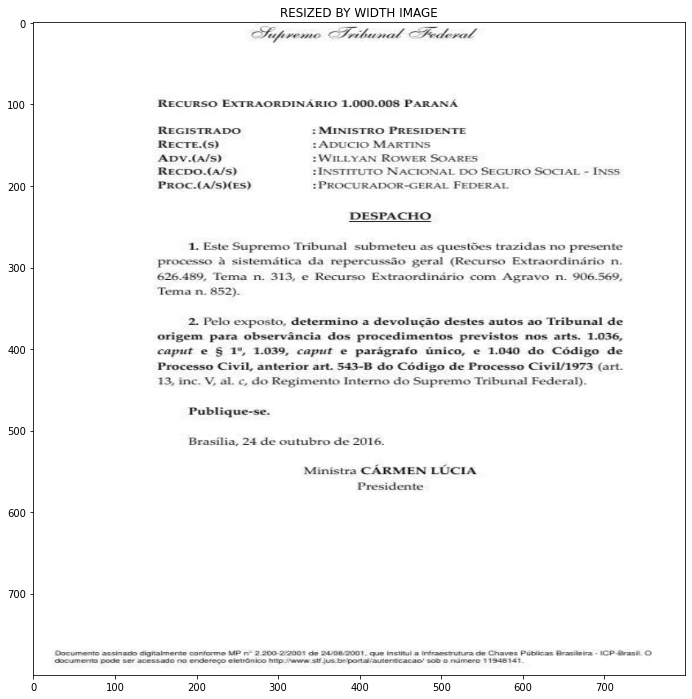

In [30]:
# Generating new image with original image height as image shape
# So, here we will convert a (800, 566, 3) image to a (800, 800, 3) image

target_image__height = cv2.resize(original_image, dst_shape__height)

cv2.imwrite('./height-img.jpg', target_image__height)
height_rezied_image = cv2.imread('./height-img.jpg')

height_resized_text = pytesseract.image_to_string(height_rezied_image, lang='por+eng')
print(height_resized_text)

plt.figure(figsize=(16,12))
plt.imshow(target_image__height)
plt.title('RESIZED BY WIDTH IMAGE')
plt.show()

In [32]:
rouge_metric = rouge.Rouge(
        metrics=['rouge-n', 'rouge-l'],
        max_n=4,
        limit_length=True,
        length_limit=100,
        length_limit_type='words',
        apply_avg=True,
        alpha=0.5,
        weight_factor=1.2,
        stemming=True
    )

# Compute Rouge Metric to get scores comparing the extracted text from width resized image with original text image

rouge_metric.get_scores([width_resized_text], [original_text])

In [63]:
# Compute Rouge Metric to get scores comparing the extracted text from height resized image with original text image

ro = rouge_metric.get_scores([height_resized_text], [original_text])

ro['rouge-l']['f']

0.9413525759831822

### Geração de Imagens considerando por meio do reshape baseado em Width e Height

In [42]:
# Generating paths for both width and height based resize images

width_resized_images_path = './width_resized_images'
height_resized_images_path = './height_resized_images'

try:
    os.mkdir(width_resized_images_path)
except Exception:
    print(width_resized_images_path + ': Already exists')

try:
    os.mkdir(height_resized_images_path)
except Exception:
    print(height_resized_images_path + ': Already exists')

./width_resized_images: Already exists
./height_resized_images: Already exists


In [47]:
# Loading original images paths

original_images_path = './is_ocr_images/'

original_paths = glob(original_images_path + '*.jpg')

In [49]:
# Creating resized images

for path in original_paths:
    image = cv2.imread(path)
    image_reference = path.split('/')[2]
    
    shape = image.shape
    width = shape[1]
    height = shape[0]
    
    w_shape = (width, width)
    h_shape = (height, height)
    
    width_reshaped_image = cv2.resize(image, w_shape)
    height_reshaped_image = cv2.resize(image, h_shape)
    
    cv2.imwrite(width_resized_images_path + '/' + image_reference, width_reshaped_image)
    cv2.imwrite(height_resized_images_path + '/' + image_reference, height_reshaped_image)

In [61]:
sample_images = list(map(lambda x: x.split('/')[2], original_paths[:100]))

In [70]:
# Extracting text from images (OCR) for sample comparison

w_rouge = []
h_rouge = []
for reference in sample_images:
    image = cv2.imread(original_images_path + reference)
    w_image = cv2.imread(width_resized_images_path + '/' + reference)
    h_image = cv2.imread(height_resized_images_path + '/' + reference)
    
    text = pytesseract.image_to_string(image, lang='por+eng')
    w_text = pytesseract.image_to_string(w_image, lang='por+eng')
    h_text = pytesseract.image_to_string(h_image, lang='por+eng')
    
    w_rouge_reference = rouge_metric.get_scores([w_text], [text])
    h_rouge_reference = rouge_metric.get_scores([h_text], [text])
    
    w_rouge.append(w_rouge_reference['rouge-l']['f'])
    h_rouge.append(h_rouge_reference['rouge-l']['f'])

In [65]:
def average (data):
    return reduce(lambda a, b: a + b, data) / len(data)

In [72]:
# Checking average of both width and height rouge values

print(average(w_rouge))
print(average(h_rouge))

0.27758800821471685
0.6218288572888083


In [2]:
images_path = './is_ocr_images/'

height_128_path = './resized_images_128'

try:
    os.mkdir(height_128_path)
except Exception:
    print(height_128_path + ': Already exists')

paths = glob(images_path + '*.jpg')

for path in paths:
    reference = path.split('/')[2]
    
    image = cv2.imread(path)
    resized = cv2.resize(image, (128, 128))
    cv2.imwrite(height_128_path + '/' + reference, resized)